### WINE QUALITY ANALYSIS

In [1]:
#TASK 2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.graph_objects as go
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('WineQT.csv')

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
df.nunique()

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

### NUMERICAL COLUMNS

In [7]:
df.columns
num_col1=[]
for col in df.columns:
    if(df[col].dtypes != 'objects'):
        num_col1.append(col)
print(num_col1)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']


In [8]:
df.columns
num_col=[]
for col in df.columns:
    if(df[col].dtypes == 'objects'):
        num_col.append(col)
print(num_col)

[]


### STATISTICS

In [9]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

/tmp/ipykernel_40/1392282026.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=take2,y=take2,data=df,palette='cubehelix')


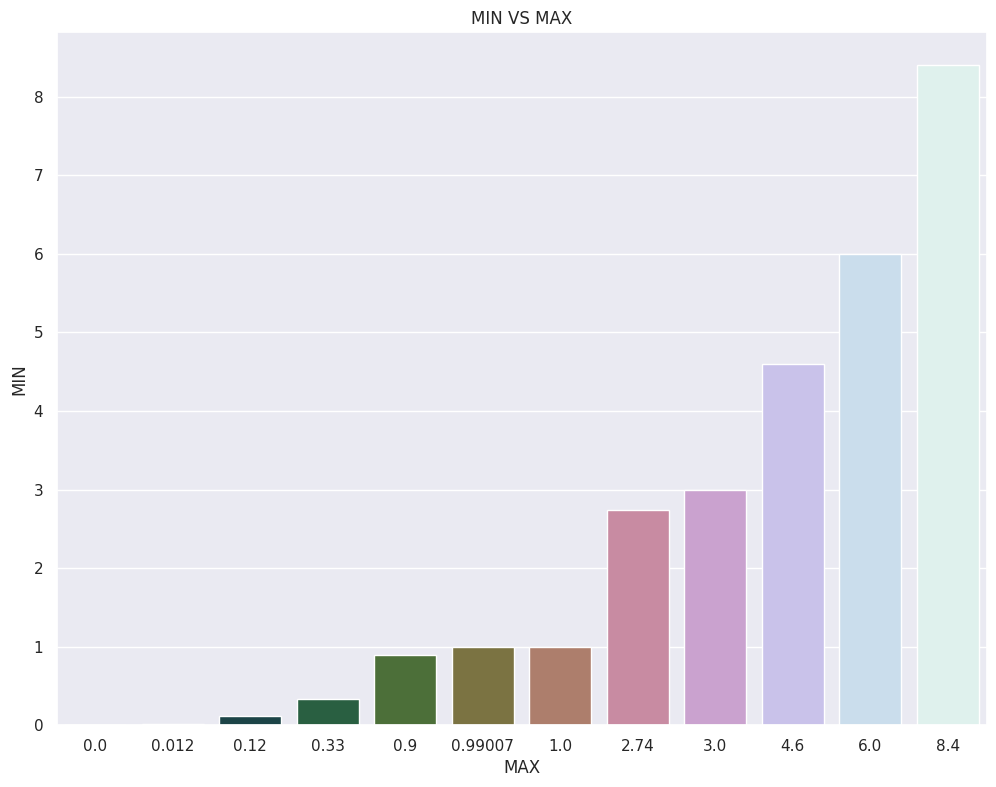

In [10]:
take1=df.max()
take2=df.min()
plt.figure(figsize=(12,9))
sns.barplot(x=take2,y=take2,data=df,palette='cubehelix')
plt.xlabel('MAX')
plt.ylabel('MIN')
plt.title("MIN VS MAX")
plt.show()

In [11]:
df.std()

fixed acidity             1.747595
volatile acidity          0.179633
citric acid               0.196686
residual sugar            1.355917
chlorides                 0.047267
free sulfur dioxide      10.250486
total sulfur dioxide     32.782130
density                   0.001925
pH                        0.156664
sulphates                 0.170399
alcohol                   1.082196
quality                   0.805824
Id                      463.997116
dtype: float64

In [12]:
df.count()

fixed acidity           1143
volatile acidity        1143
citric acid             1143
residual sugar          1143
chlorides               1143
free sulfur dioxide     1143
total sulfur dioxide    1143
density                 1143
pH                      1143
sulphates               1143
alcohol                 1143
quality                 1143
Id                      1143
dtype: int64

### EXPLORATORY DATA ANALYSIS 
- THE MAIN CHARACTERSTIC OF THIS EDA ANALYSIS IS TO OBTAIN THE NORMAL QUALITY OF WINE .
- FIRST WE NEED TO ABSOLUETLY SEGREGATE THE COLUMNS AND MINIMIZE IT .
- PH VALUE IS ONE OF THE MOST IMPORTANT FACTOR THAT ARE USED TO DISPLAY THE QUALITY .
- MOVING FOWARD THROUGH ANALYSIS OF THE QUALITY OF WINE AND DISPLAYING THEM ALONG WITH THERE ID.
- PH VS ACIDIDTY.
- CHEMICAL QUANTITIES VS PH .
- QUALITY VS CHEMICAL QUANTITIES.

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

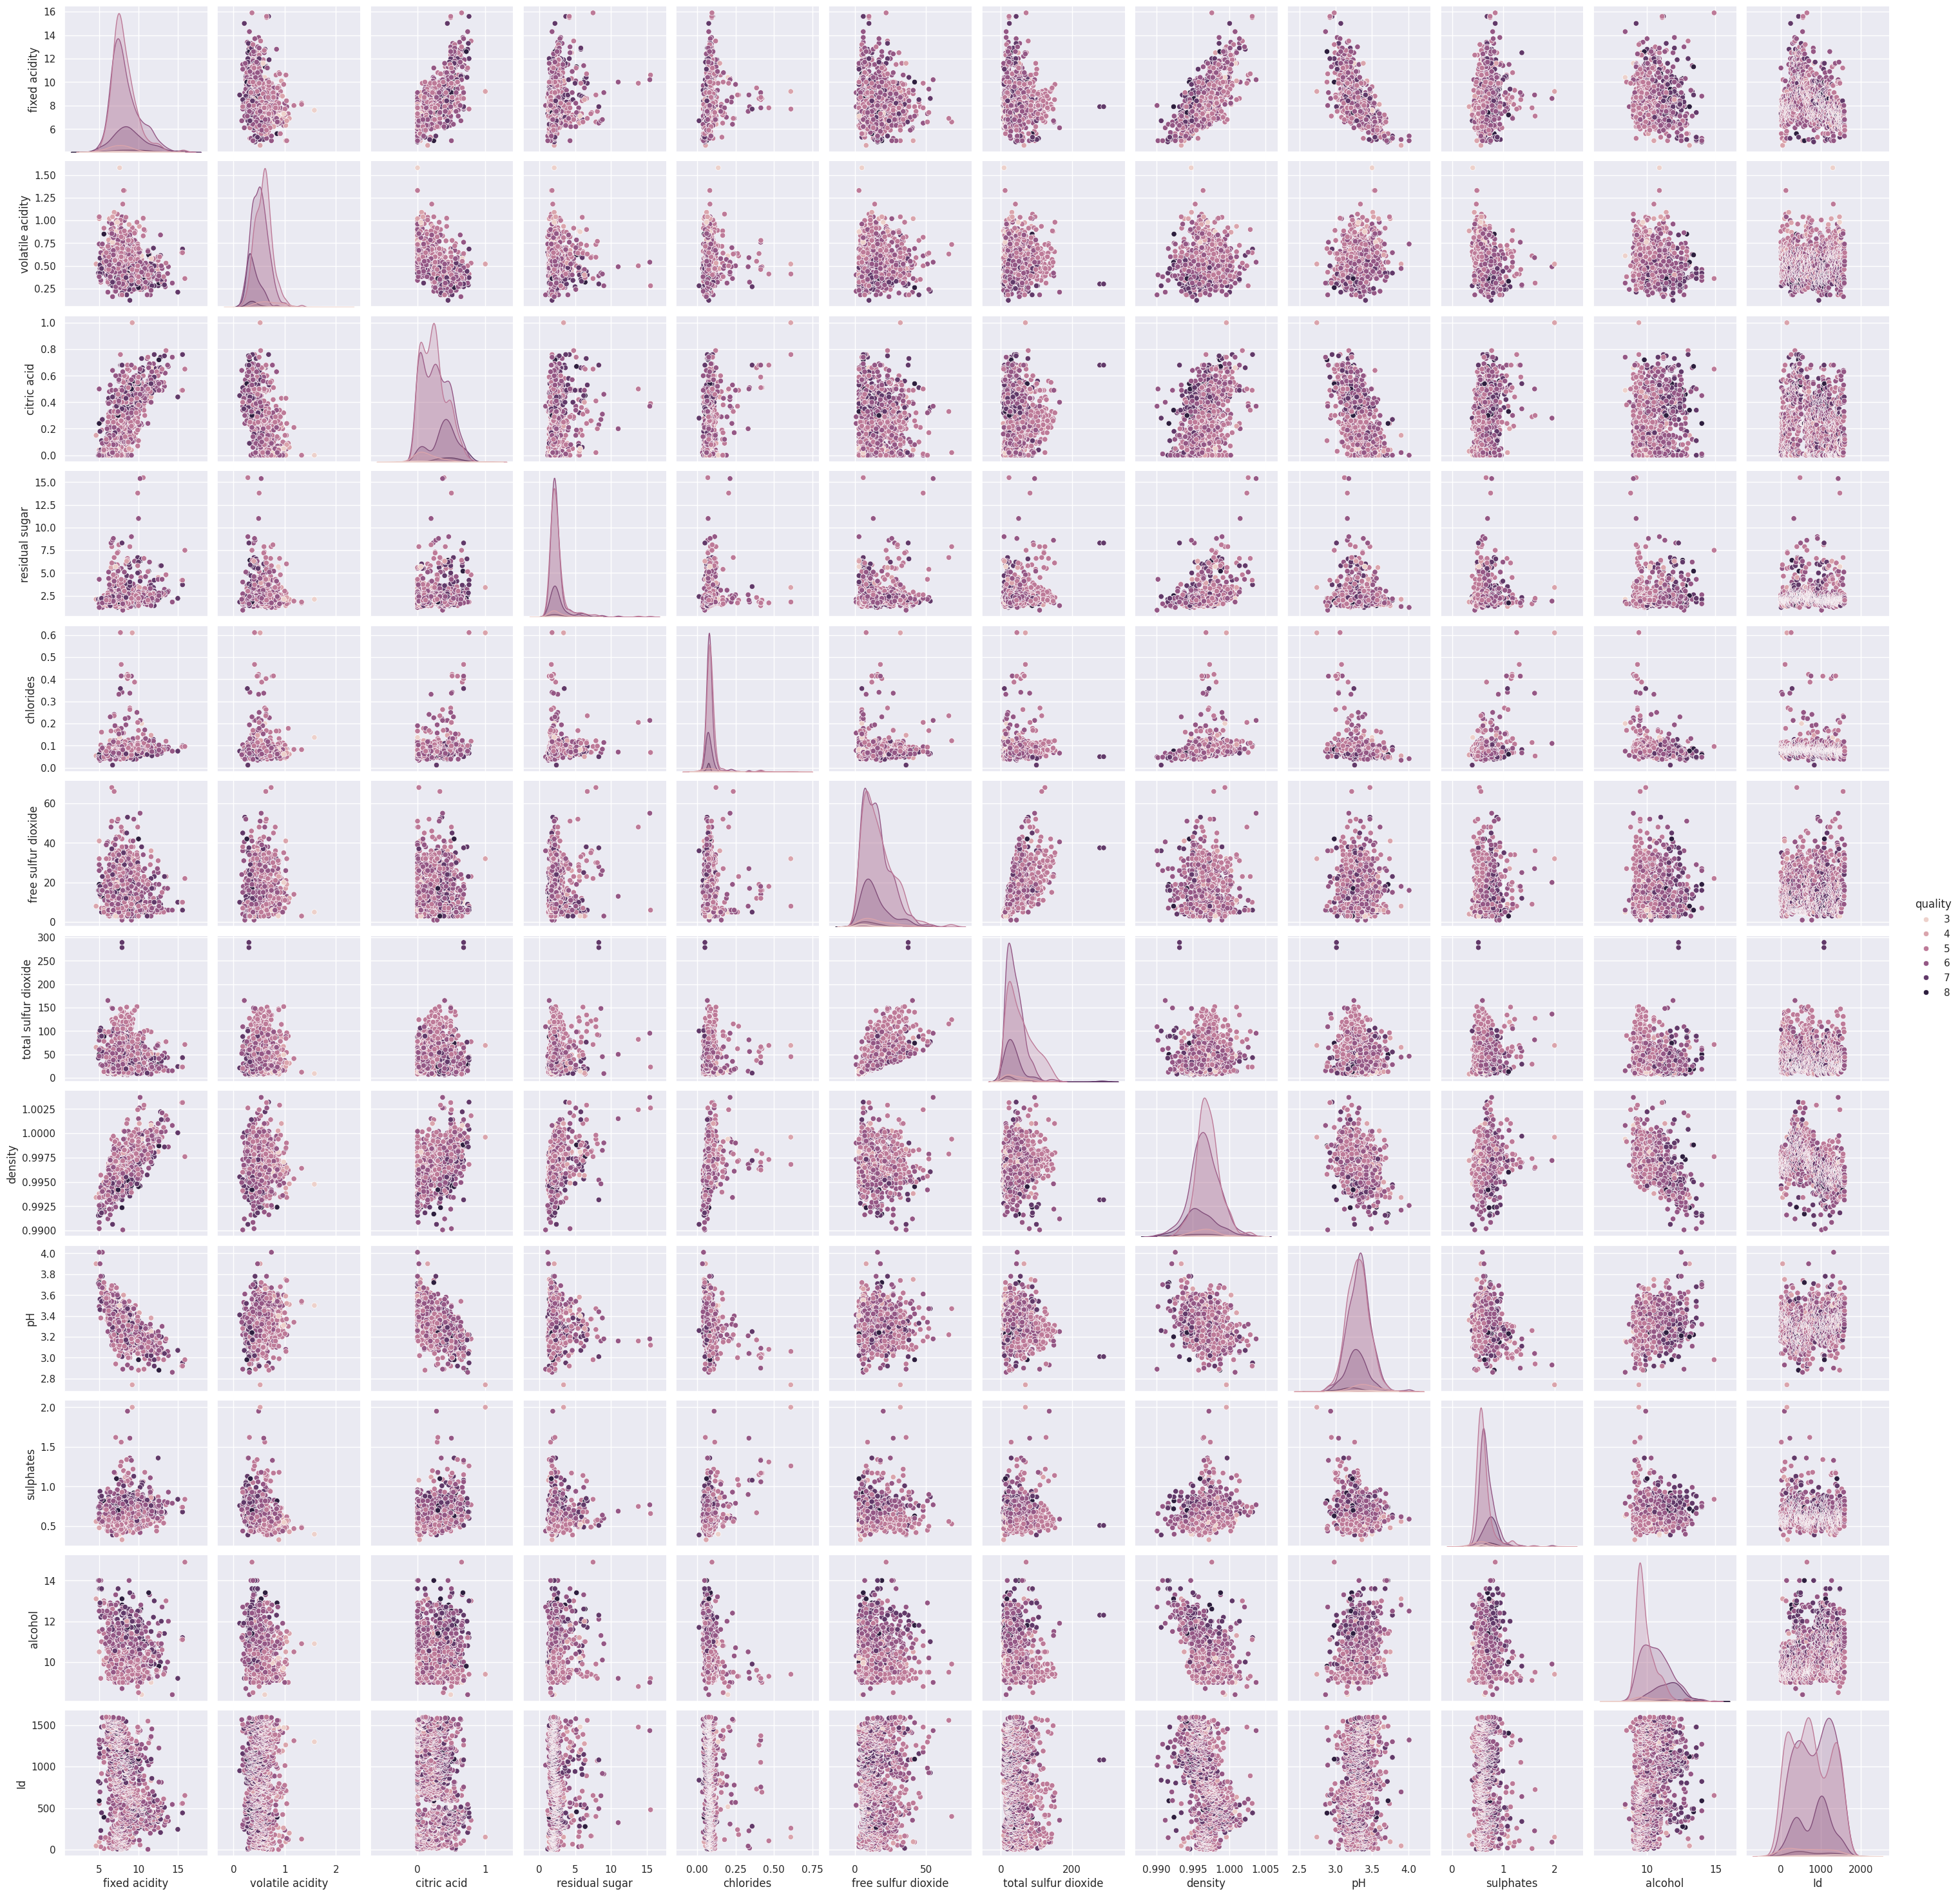

In [14]:
sns.pairplot(data=df,hue='quality')
plt.show()

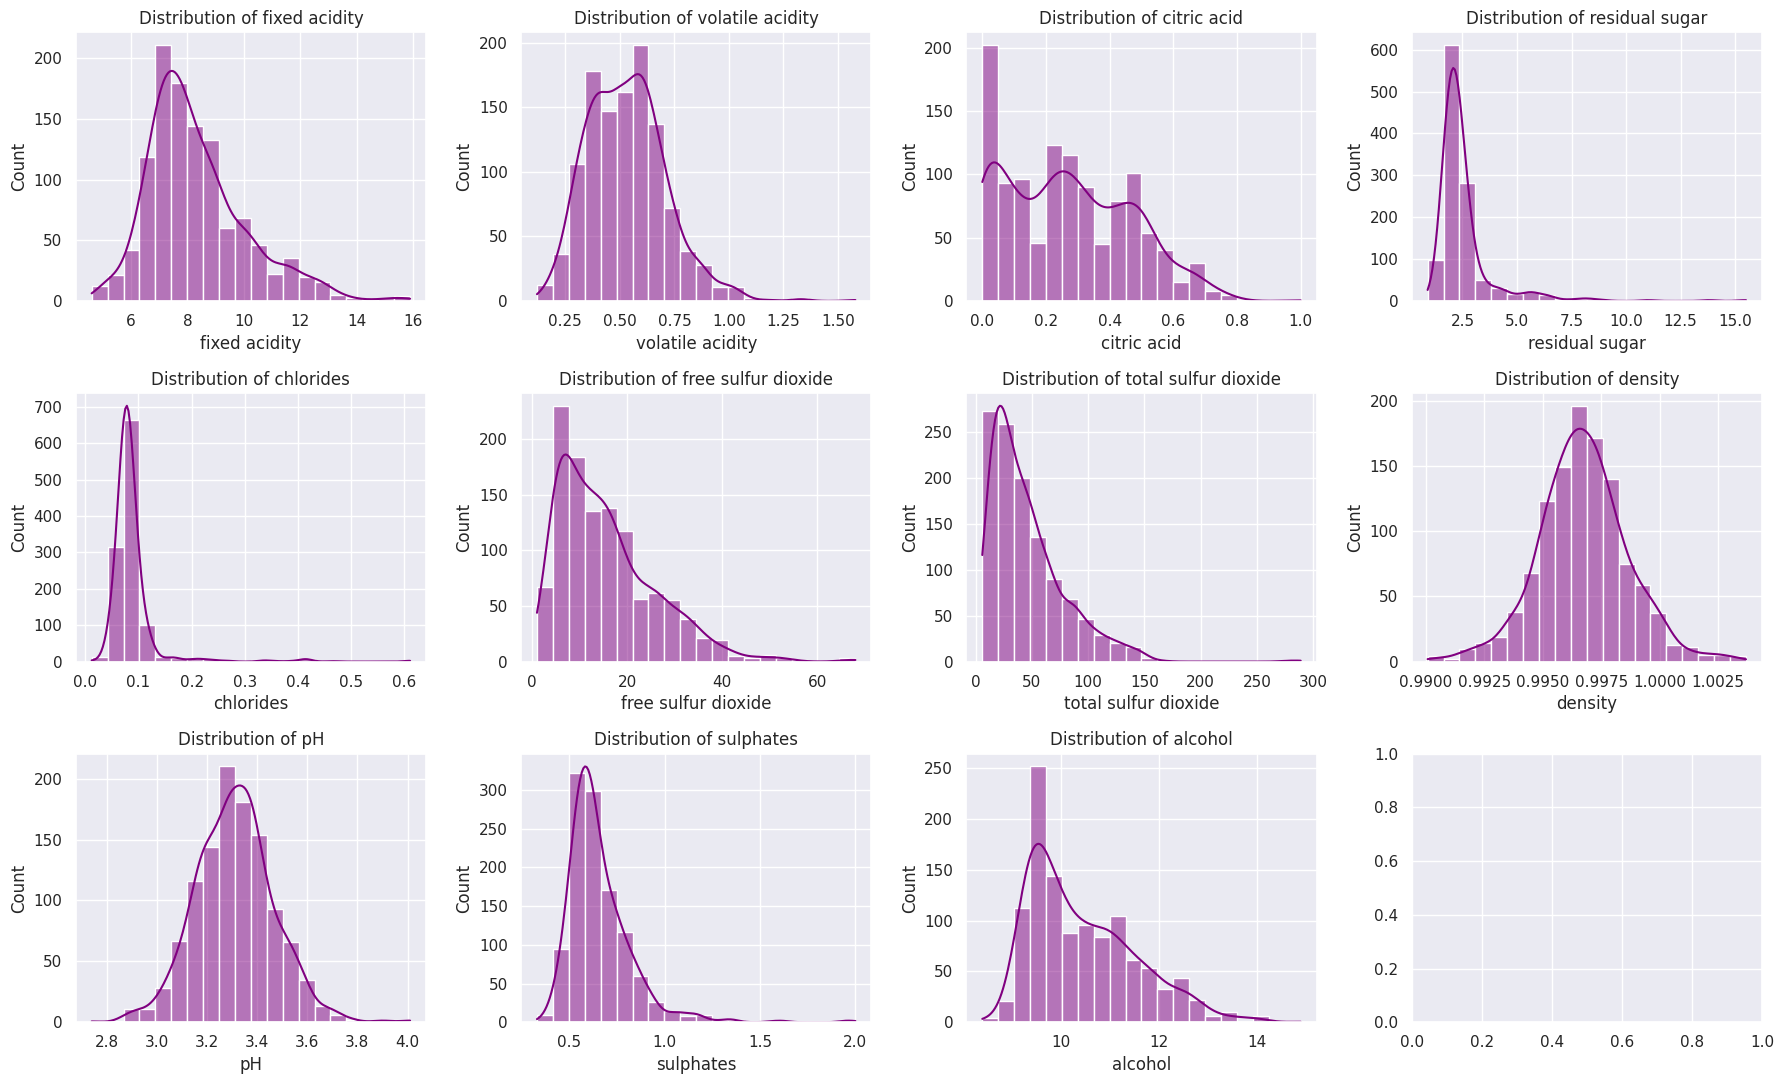

In [15]:
fig, axes= plt.subplots(nrows=3, ncols=4, figsize=(18, 11))

# Flatten the axes array for easire indexing
axes = axes.flatten()
num_col1 = df.select_dtypes(include=['float64']).columns
for i, column in enumerate(num_col1):
    sns.histplot(df[column], ax=axes[i], kde=True, bins=20, color='purple')
    axes[i].set_title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='None', ylabel='Count'>

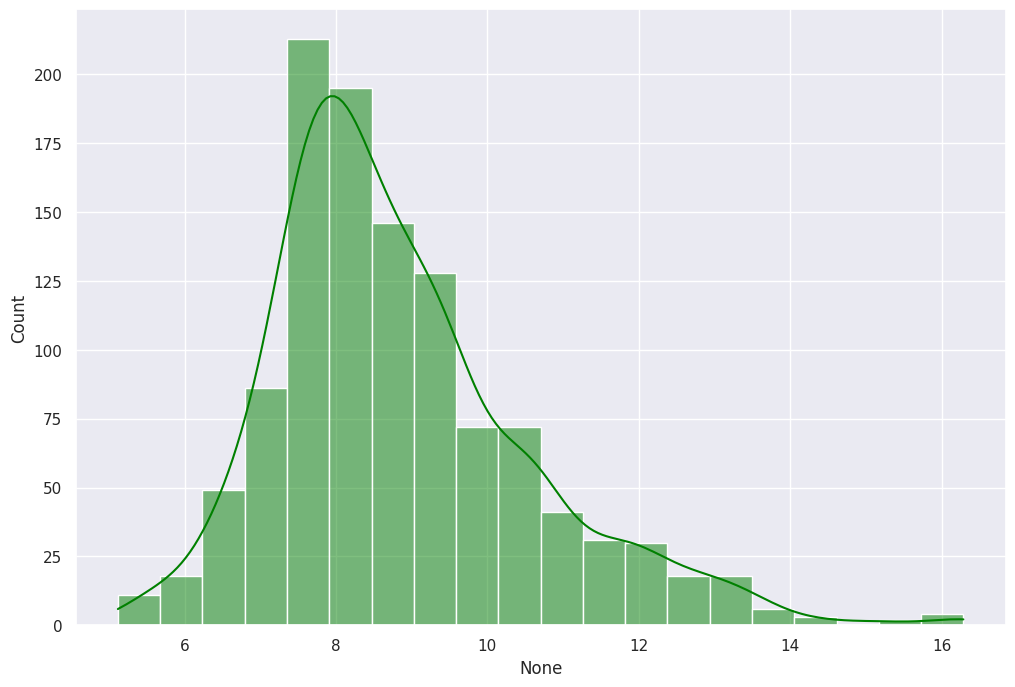

In [16]:
#the total aciddity present in the wine 
acidity=df['fixed acidity']+df['volatile acidity']
plt.figure(figsize=(12,8))
sns.histplot(x=acidity,data=df,bins=20,kde=True,color='green')

PH VS ACIDITY

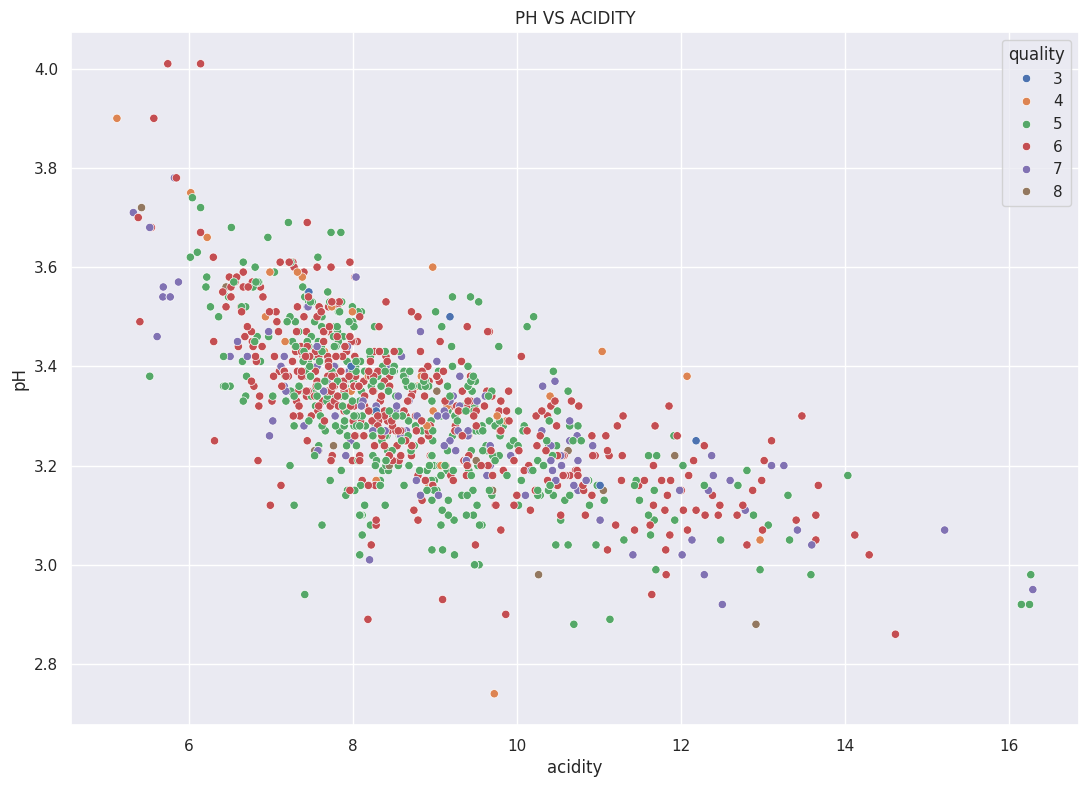

In [17]:
plt.figure(figsize=(13,9))
sns.scatterplot(x=acidity,y='pH',data=df,hue='quality',palette='deep')
plt.title("PH VS ACIDITY")
plt.xlabel("acidity")
plt.show()

PH VS CHEMICAL QUANTITIES 

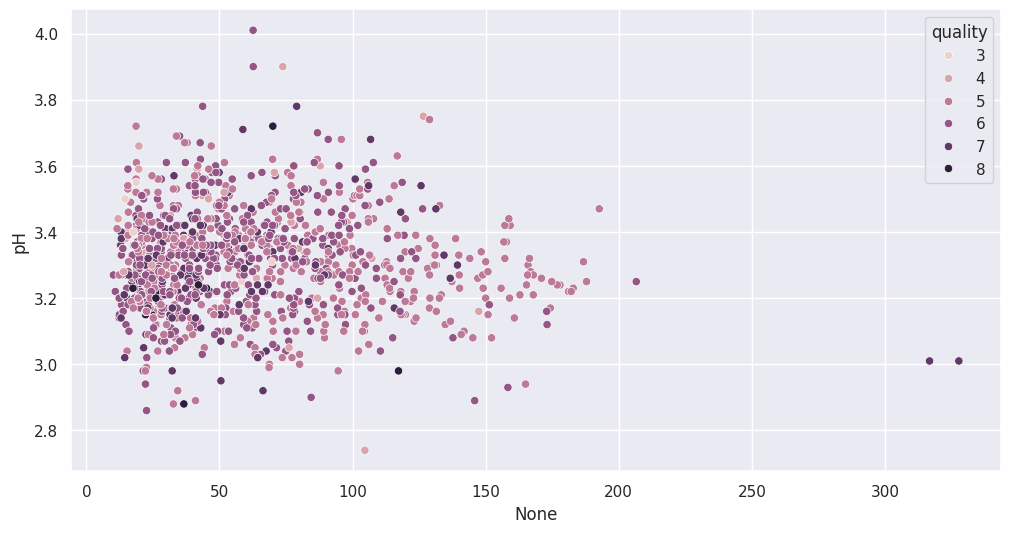

In [18]:
plt.figure(figsize=(12,6))
df['chemical']=df['free sulfur dioxide']+df['total sulfur dioxide']
chemical_qualities=df['citric acid']+df['chlorides']+df['sulphates']+df['chemical']
sns.scatterplot(x=chemical_qualities,y='pH',data=df,hue='quality')
plt.show()

/tmp/ipykernel_40/3966169794.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




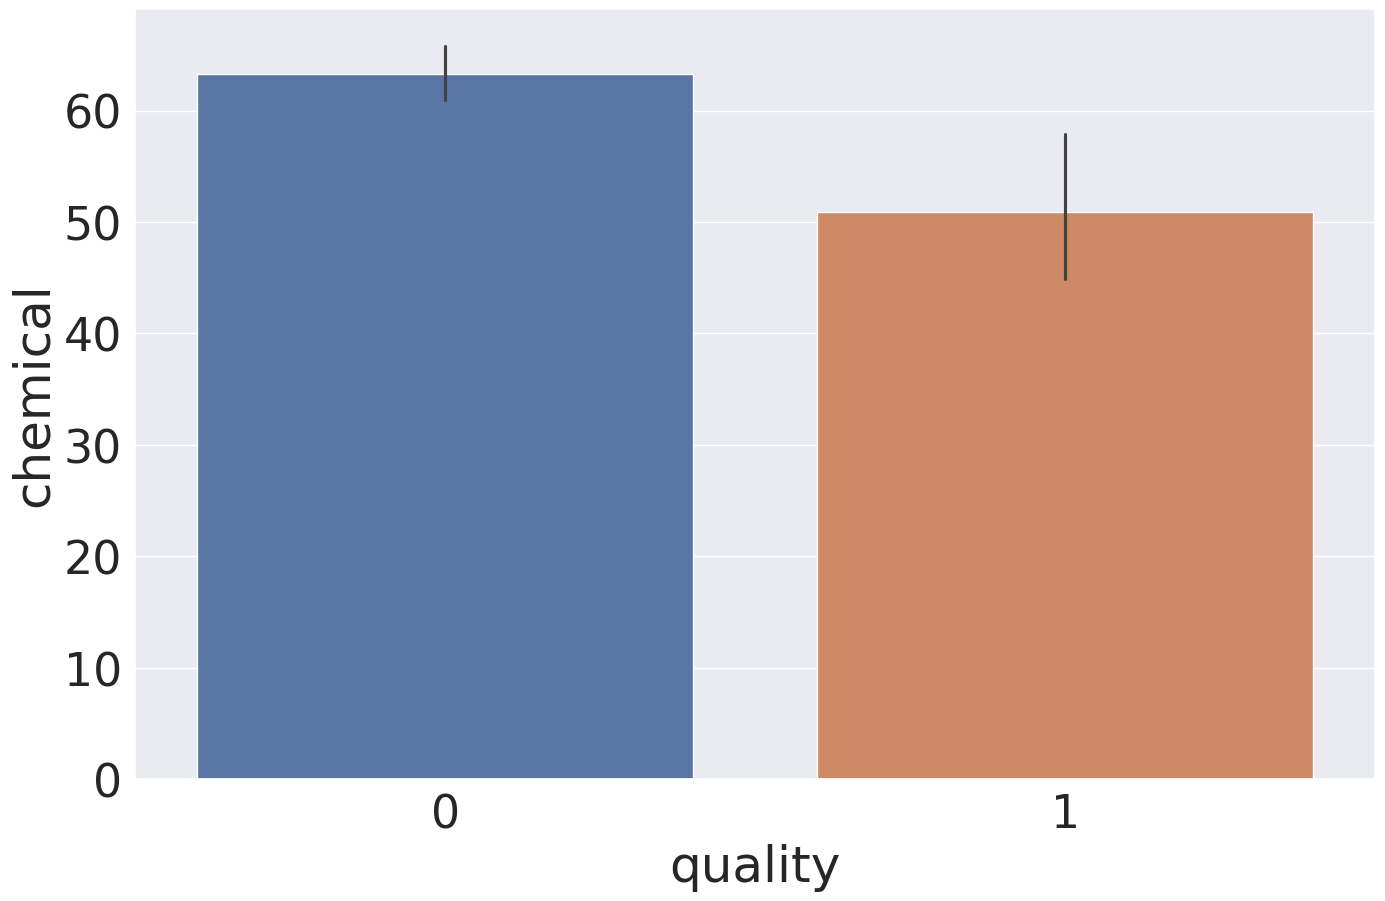

In [57]:
df['chemical']=df['free sulfur dioxide']+df['total sulfur dioxide']
plt.figure(figsize = (16, 10))
sns.barplot(x='quality',y='chemical',data=df,palette='deep')
plt.show()

In [59]:
for column in df.columns:
    fig = px.box(df, y=column, title=f'Box plot for {column}')
    fig.show()

In [21]:
bins=[2,6.5,8]
classes=['bad','good']
df['quality']=pd.cut(df['quality'],bins=bins,labels=classes)

In [22]:
label_quality=LabelEncoder()

In [23]:
df['quality']=label_quality.fit_transform(df['quality'])

In [24]:
df['quality'].value_counts()

quality
0    984
1    159
Name: count, dtype: int64

### 0 Indicates bad quality while 1 indicates good

Text(0.5, 1.0, 'BAD AND GOOD WINE')

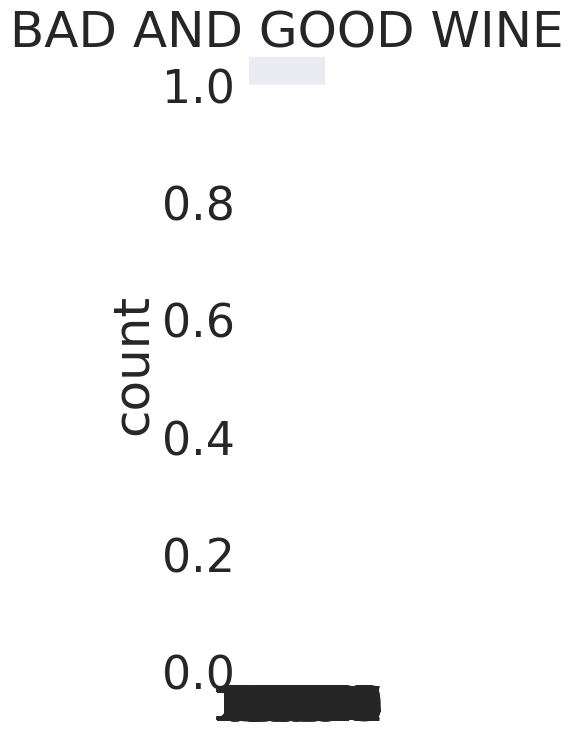

In [62]:
plt.figure(figsize=(1,8))
sns.set(font_scale=3)
sns.countplot(df['quality'])
plt.title('BAD AND GOOD WINE')

## RandomForestClassifier

In [26]:
x=df.drop(['quality'],axis=1)

In [27]:
y=df['quality']
y

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64

In [28]:
y.value_counts()

quality
0    984
1    159
Name: count, dtype: int64

In [29]:
#using lambda function
y=y.apply(lambda y_value:1 if y_value>=1 else 0)
y.value_counts()

quality
0    984
1    159
Name: count, dtype: int64

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2529,stratify=y)

In [64]:
x_train.shape ,x_test.shape ,y_train.shape,y_test.shape

((914, 13), (229, 13), (914,), (229,))

In [32]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)

In [76]:
predict1=accuracy_score(y_test,pred_rf)
print(predict1*100)

89.51965065502183


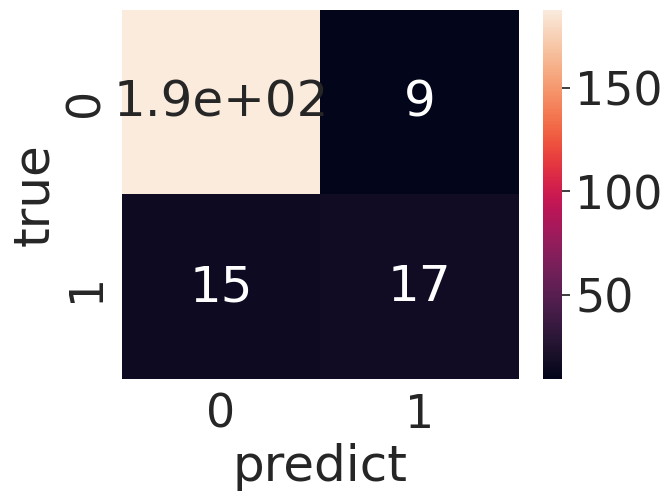

In [34]:
cml=confusion_matrix(y_test,pred_rf)
ax1= sns.heatmap(cml,annot=True)
ax1.set(xlabel='predict',ylabel='true')
plt.show()

In [35]:
model = RandomForestClassifier()

In [36]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
y_test_predict=model.predict(x_test)

In [38]:
accuracy_t=metrics.accuracy_score(y_test_predict,y_test)

In [39]:
accuracy_t

0.8951965065502183

# The accuracy of the model is 89% for randomforestclassifier.In jupyter it prooduces 100%

# SVC [SUPPORT VECTOR CLASSIFICATION]:
- Obtaining the unique values of quality and the mean value of this column

In [40]:
df.groupby('quality').mean()
#the mean value of all the columns are obtained under the category of quality

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
0             8.224593          0.553318     0.248516        2.497205   
1             8.846541          0.395314     0.391195        2.748428   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
0         0.088908            15.846037             47.408028  0.996845   
1         0.074711            14.188679             36.672956  0.996019   

               pH  sulphates    alcohol          Id   chemical  
quality                                                         
0        3.315630   0.643465  10.266582  801.396341  63.254065  
1        3.282453   0.745849  11.528407  827.081761  50.861635

### DEFINING THE Y [TARGET VALUE] AND X VARIABLE [INDEPENDENT VARIABLE]:
- In random classification we have seprated the values 
- shape of the variables

In [41]:
x.shape

(1143, 13)

In [42]:
y.shape

(1143,)

In [43]:
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol    Id  chemical  
0         9.4     0      45.0  
1         9.8     1      92.0  
2         9.8     2      69.0  
3         9.8     3      77.0  
4         9.4     4      45.0  
...       ...   ...       ...  
1138     11.0  1592      69.0  
1139      9.5  1593      66.0  
1140     10.5  1594      76.0  
1141     11.2  1595      90.0  
1142     10.2  1597      76.0  

[1143 rows x 13 columns]

From sklearn import standard scaler

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
ss=StandardScaler()

In [46]:
x=ss.fit_transform(x)

In [47]:
x

array([[-0.52157961,  0.93933222, -1.36502663, ..., -0.96338181,
        -1.73561799, -0.41036434],
       [-0.29259344,  1.94181282, -1.36502663, ..., -0.59360107,
        -1.73346186,  0.75641785],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.59360107,
        -1.73130573,  0.18543933],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ...,  0.05351522,
         1.70125196,  0.3592154 ],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  0.70063152,
         1.70340809,  0.70676754],
       [-1.38027776,  0.6330187 , -0.75464959, ..., -0.22382033,
         1.70772035,  0.3592154 ]])

Implementing SVC in training and testing 

In [48]:
from sklearn.svm import SVC

In [49]:
svc = SVC()

In [50]:
y_train
unique_classes = np.unique(y_train)# printing the label as there is class leabel error
print(unique_classes)

[0 1]


In [51]:
from collections import Counter

class_counts = Counter(y_train)
print("Class counts:", class_counts)# checking whether there is any occurence of correlation

Class counts: Counter({0: 787, 1: 127})


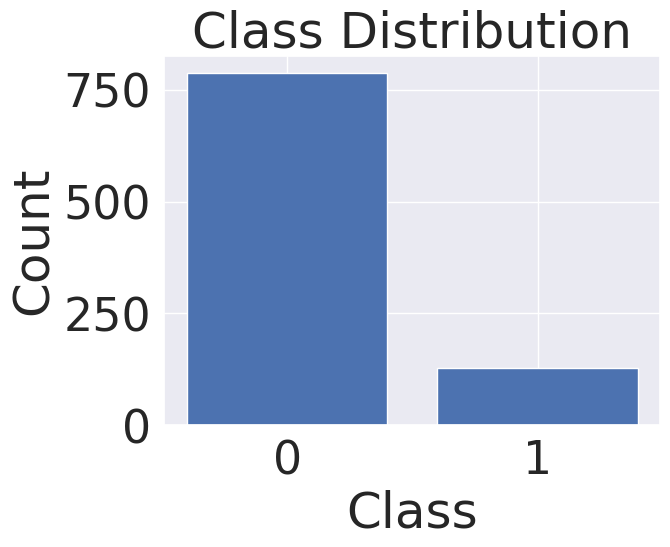

In [52]:
#visualization of the trained data for better understanding
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

### MODEL PREDICTION

In [53]:
svc_model=SVC(C=50,kernel="rbf")

# fit model
svc_model.fit(x_train,y_train)

y_pred_svc =svc_model.predict(x_test)

print("Score the X-train with Y-train is : ", svc_model.score(x_train,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(x_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score the X-train with Y-train is :  0.8610503282275711
Score the X-test  with Y-test  is :  0.8602620087336245
 Model Evaluation Decision Tree : accuracy score  0.8602620087336245


- 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=465f362d-158c-47df-86be-9ea859bfe1b7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>